In [90]:
ls = [758.0, 860.0, 690.0, 581.0, 5043.5, 712.0, 1012.0, 829.5, 4774.5, 7550.5, 1134.0, 1310.0, 935.5, 9042.0, 8909.5, 723.5, 1103.0, 880.0, 635.0, 5535.5, 1555.0]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
bike_real_results = [7,7,11,8,7,15,2,6,6,11,5,8,9,7,10,10,7,13,15,22,11,6,10,4,3,2,12,7]

In [93]:
car_real_results = [5,7,10,9,11,8,9,5,8,9,8,10,8,6,9,8,10,12,8,9,12,11,8,5,9,4,9,12]
len(car_real_results)

28

In [94]:
df = pd.DataFrame({"area":ls})

In [95]:
df

area
0    758.0
1    860.0
2    690.0
3    581.0
4   5043.5
5    712.0
6   1012.0
7    829.5
8   4774.5
9   7550.5
10  1134.0
11  1310.0
12   935.5
13  9042.0
14  8909.5
15   723.5
16  1103.0
17   880.0
18   635.0
19  5535.5
20  1555.0

In [96]:
df[df['area']<1000]

area
0   758.0
1   860.0
2   690.0
3   581.0
5   712.0
7   829.5
12  935.5
15  723.5
17  880.0
18  635.0

In [97]:
df[(df['area']>2000) & (df['area'] < 5500)]

area
4  5043.5
8  4774.5

In [98]:
df[df['area']>5000].count().values[0]

5

In [4]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def count_image(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > 2000].count().values[0]
    bikes = df[df['area'] <= 1500].count().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes

In [100]:
real_outputs

cars  bike
1      5     7
2      7     7
3     10    11
4      9     8
5     11     7
6      8    15
7      9     2
8      5     6
9      8     6
10     9    11
11     8     5
12    10     8
13     8     9
14     6     7
15     9    10
16     8    10
17    10     7
18    12    13
19     8    15
20     9    22
21    12    11
22    11     6
23     8    10
24     5     4
25     9     3
26     4     2
27     9    12
28    12     7

In [5]:
cars_count = []
bikes_count = []
for i in range(1,29):
    c,b = count_image(f'erode{i}.png',f'frames/{i}.png')
    cars_count.append(c)
    bikes_count.append(b)

CARS -----> 5
bikes -----> 5
CARS -----> 7
bikes -----> 7
CARS -----> 10
bikes -----> 10
CARS -----> 11
bikes -----> 10
CARS -----> 9
bikes -----> 10
CARS -----> 6
bikes -----> 14
CARS -----> 8
bikes -----> 2
CARS -----> 5
bikes -----> 6
CARS -----> 9
bikes -----> 3
CARS -----> 9
bikes -----> 8
CARS -----> 8
bikes -----> 3
CARS -----> 9
bikes -----> 9
CARS -----> 8
bikes -----> 5
CARS -----> 6
bikes -----> 6
CARS -----> 8
bikes -----> 10
CARS -----> 7
bikes -----> 6
CARS -----> 8
bikes -----> 7
CARS -----> 10
bikes -----> 10
CARS -----> 8
bikes -----> 12
CARS -----> 9
bikes -----> 13
CARS -----> 11
bikes -----> 8
CARS -----> 8
bikes -----> 9
CARS -----> 7
bikes -----> 8
CARS -----> 5
bikes -----> 3
CARS -----> 7
bikes -----> 4
CARS -----> 3
bikes -----> 4
CARS -----> 7
bikes -----> 12
CARS -----> 7
bikes -----> 11


In [8]:
objects_detected = pd.DataFrame({'Frame_NO':[x for x in range(1,29)],'BIKES_DETECTED':bikes_count,'CARS_DETECTED':cars_count})

In [11]:
objects_detected.to_csv("Detected_objects.csv",index = False)

<BarContainer object of 28 artists>

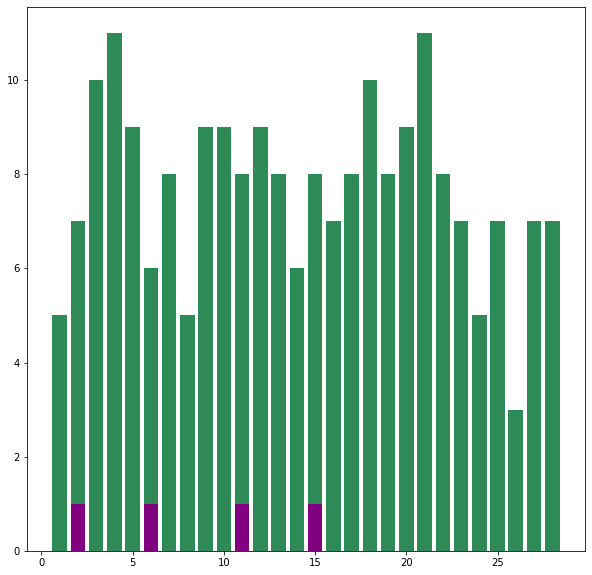

In [102]:
plt.figure(figsize=(10,10))
plt.bar([x for x in range(1,29)],cars_count,color = 'seagreen')
plt.bar([x for x in range(1,29)],bike_output,color = 'purple')


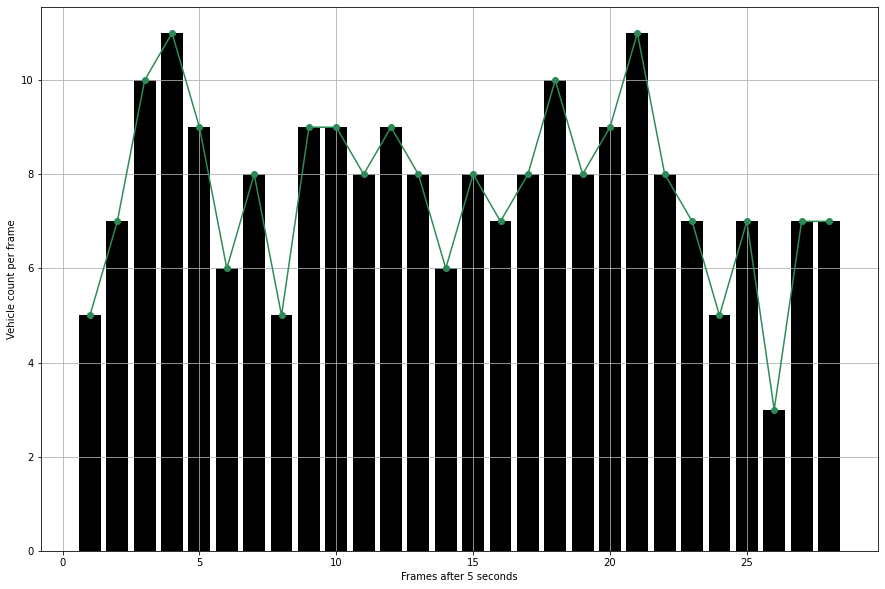

In [106]:
plt.figure(figsize = (15,10))
x = [x for x in range(1,29)]

plt.xlabel("Frames after 5 seconds")
plt.ylabel("Vehicle count per frame")
plt.grid()
plt.plot([i for i in range(1,29)],cars_count,marker='o',color ='seagreen')
plt.bar([i for i in range(1,29)],cars_count,color ='black')
plt.show()

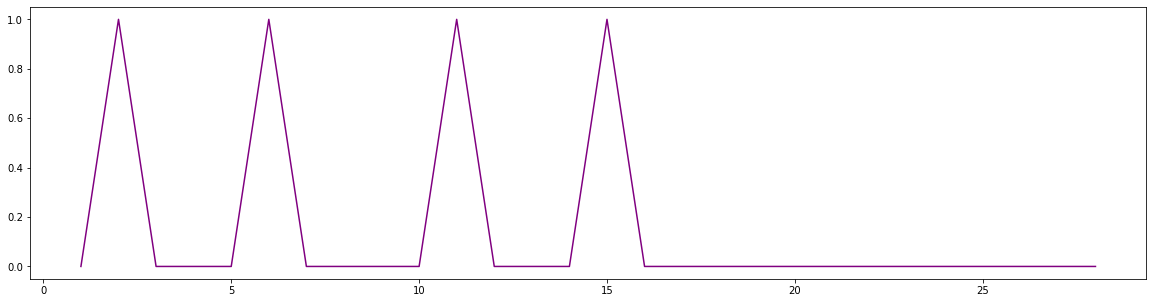

In [107]:
plt.figure(figsize=(20,5))
plt.plot([x for x in range(1,29)],bike_output,color = 'purple')

In [ ]:
count_200_range = pd.DataFrame({'cars':cars_count,'bikes':bikes_count})
count_200_range

In [108]:
cars_count = []
bikes_count = []
for i in range(1,29):
    c,b = count_image(f'erode{i}.png',f'frames/{i}.png')
    cars_count.append(c)
    bikes_count.append(b)

CARS -----> 5
bikes -----> 5
CARS -----> 7
bikes -----> 7
CARS -----> 10
bikes -----> 10
CARS -----> 11
bikes -----> 10
CARS -----> 9
bikes -----> 10
CARS -----> 6
bikes -----> 14
CARS -----> 8
bikes -----> 2
CARS -----> 5
bikes -----> 6
CARS -----> 9
bikes -----> 3
CARS -----> 9
bikes -----> 8
CARS -----> 8
bikes -----> 3
CARS -----> 9
bikes -----> 9
CARS -----> 8
bikes -----> 5
CARS -----> 6
bikes -----> 6
CARS -----> 8
bikes -----> 10
CARS -----> 7
bikes -----> 6
CARS -----> 8
bikes -----> 7
CARS -----> 10
bikes -----> 10
CARS -----> 8
bikes -----> 12
CARS -----> 9
bikes -----> 13
CARS -----> 11
bikes -----> 8
CARS -----> 8
bikes -----> 9
CARS -----> 7
bikes -----> 8
CARS -----> 5
bikes -----> 3
CARS -----> 7
bikes -----> 4
CARS -----> 3
bikes -----> 4
CARS -----> 7
bikes -----> 12
CARS -----> 7
bikes -----> 11


In [109]:
count_1500_range = pd.DataFrame({'cars':cars_count,'bikes':bikes_count},index=[i for i in range(1,29)])
count_1500_range

cars  bikes
1      5      5
2      7      7
3     10     10
4     11     10
5      9     10
6      6     14
7      8      2
8      5      6
9      9      3
10     9      8
11     8      3
12     9      9
13     8      5
14     6      6
15     8     10
16     7      6
17     8      7
18    10     10
19     8     12
20     9     13
21    11      8
22     8      9
23     7      8
24     5      3
25     7      4
26     3      4
27     7     12
28     7     11

In [110]:
real_outputs = pd.DataFrame({'cars':car_real_results,'bike':bike_real_results},index=[i for i in range(1,29)])

In [111]:
real_outputs

cars  bike
1      5     7
2      7     7
3     10    11
4      9     8
5     11     7
6      8    15
7      9     2
8      5     6
9      8     6
10     9    11
11     8     5
12    10     8
13     8     9
14     6     7
15     9    10
16     8    10
17    10     7
18    12    13
19     8    15
20     9    22
21    12    11
22    11     6
23     8    10
24     5     4
25     9     3
26     4     2
27     9    12
28    12     7

In [112]:
output = np.where(count_1500_range['cars'] == real_outputs['cars'],True,False)
output = pd.DataFrame({'results':output})

In [113]:
output[output['results'] == True]

results
0      True
1      True
2      True
7      True
9      True
10     True
12     True
13     True
18     True
19     True
23     True

In [114]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def GNN_DATA(erode_image,original,bike_range,car_range):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
        cv2.waitKey(0)
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    #print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    #print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > car_range].count().values[0]
    bikes = df[df['area'] <= bike_range].count().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes

In [115]:
results = {'bike_range':[],'car_range':[],'accuracy_bike%':[],'accuracy_car%':[],'cars_detected':[],'bike_detected':[]}
for i in range(100):
    print(f'iter ===> {i} ')
    bike_range = np.random.randint(1500,1800)
    car_range = np.random.randint(1800,2000)
    cars_count = []
    bikes_count = []
    for i in range(1,29):
        c,b = GNN_DATA(f'erode{i}.png',f'frames/{i}.png',bike_range,car_range)
        cars_count.append(c)
        bikes_count.append(b)
    detected = pd.DataFrame({'cars':cars_count,'bikes':bikes_count},index=[i for i in range(1,29)])
    car_output = np.where(detected['cars'] == real_outputs['cars'],True,False,)
    bike_output = np.where(detected['bikes'] == real_outputs['bike'],True,False)
    outputcar = pd.DataFrame({'results':car_output})
    outputbike = pd.DataFrame({'results':bike_output})
    results['bike_range'].append(bike_range)
    results['car_range'].append(car_range)
    results['accuracy_car%'].append(len(outputcar[outputcar['results']==True])/28)
    results['accuracy_bike%'].append(len(outputbike[outputbike['results']==True])/28)
    results['cars_detected'].append(len(outputcar[outputcar['results']==True]))
    results['bike_detected'].append(len(outputbike[outputbike['results']==True]))

iter ===> 0 
iter ===> 1 
iter ===> 2 
iter ===> 3 
iter ===> 4 
iter ===> 5 
iter ===> 6 
iter ===> 7 
iter ===> 8 
iter ===> 9 
iter ===> 10 
iter ===> 11 
iter ===> 12 
iter ===> 13 
iter ===> 14 
iter ===> 15 
iter ===> 16 
iter ===> 17 
iter ===> 18 
iter ===> 19 
iter ===> 20 
iter ===> 21 
iter ===> 22 
iter ===> 23 
iter ===> 24 
iter ===> 25 
iter ===> 26 
iter ===> 27 
iter ===> 28 
iter ===> 29 
iter ===> 30 
iter ===> 31 
iter ===> 32 
iter ===> 33 
iter ===> 34 
iter ===> 35 
iter ===> 36 
iter ===> 37 
iter ===> 38 
iter ===> 39 
iter ===> 40 
iter ===> 41 
iter ===> 42 
iter ===> 43 
iter ===> 44 
iter ===> 45 
iter ===> 46 
iter ===> 47 
iter ===> 48 
iter ===> 49 
iter ===> 50 
iter ===> 51 
iter ===> 52 
iter ===> 53 
iter ===> 54 
iter ===> 55 
iter ===> 56 
iter ===> 57 
iter ===> 58 
iter ===> 59 
iter ===> 60 
iter ===> 61 
iter ===> 62 
iter ===> 63 
iter ===> 64 
iter ===> 65 
iter ===> 66 
iter ===> 67 
iter ===> 68 
iter ===> 69 
iter ===> 70 
iter ===> 71 
it

In [116]:
final = pd.DataFrame(results)
final

bike_range  car_range  accuracy_bike%  accuracy_car%  cars_detected  \
0         1771       1965        0.142857       0.321429              9   
1         1778       1807        0.142857       0.357143             10   
2         1742       1918        0.142857       0.357143             10   
3         1543       1831        0.214286       0.321429              9   
4         1779       1884        0.142857       0.357143             10   
..         ...        ...             ...            ...            ...   
95        1520       1910        0.214286       0.357143             10   
96        1622       1998        0.250000       0.357143             10   
97        1668       1806        0.214286       0.357143             10   
98        1664       1814        0.214286       0.357143             10   
99        1660       1816        0.214286       0.357143             10   

    bike_detected  
0               4  
1               4  
2               4  
3               6  
4               4  
..            ...  
95              6  
96              7  
97              6  
98              6  
99              6  

[100 rows x 6 columns]

In [117]:
final[final['accuracy_car%'] > .30]

bike_range  car_range  accuracy_bike%  accuracy_car%  cars_detected  \
0         1771       1965        0.142857       0.321429              9   
1         1778       1807        0.142857       0.357143             10   
2         1742       1918        0.142857       0.357143             10   
3         1543       1831        0.214286       0.321429              9   
4         1779       1884        0.142857       0.357143             10   
..         ...        ...             ...            ...            ...   
95        1520       1910        0.214286       0.357143             10   
96        1622       1998        0.250000       0.357143             10   
97        1668       1806        0.214286       0.357143             10   
98        1664       1814        0.214286       0.357143             10   
99        1660       1816        0.214286       0.357143             10   

    bike_detected  
0               4  
1               4  
2               4  
3               6  
4               4  
..            ...  
95              6  
96              7  
97              6  
98              6  
99              6  

[98 rows x 6 columns]

In [118]:
final[final['accuracy_bike%'] > .20]

bike_range  car_range  accuracy_bike%  accuracy_car%  cars_detected  \
3         1543       1831        0.214286       0.321429              9   
5         1531       1992        0.214286       0.357143             10   
6         1681       1906        0.214286       0.357143             10   
8         1564       1906        0.250000       0.357143             10   
9         1595       1804        0.250000       0.357143             10   
10        1623       1831        0.250000       0.321429              9   
11        1632       1988        0.250000       0.357143             10   
13        1631       1919        0.250000       0.357143             10   
15        1587       1903        0.250000       0.357143             10   
20        1659       1880        0.214286       0.357143             10   
21        1610       1948        0.250000       0.357143             10   
23        1646       1961        0.250000       0.321429              9   
24        1572       1891        0.250000       0.357143             10   
25        1580       1816        0.250000       0.357143             10   
27        1596       1851        0.250000       0.321429              9   
28        1647       1948        0.250000       0.357143             10   
29        1556       1940        0.250000       0.357143             10   
30        1598       1900        0.250000       0.357143             10   
31        1539       1806        0.214286       0.357143             10   
33        1680       1989        0.214286       0.357143             10   
35        1653       1900        0.250000       0.357143             10   
36        1579       1879        0.250000       0.357143             10   
39        1587       1846        0.250000       0.321429              9   
41        1502       1948        0.214286       0.357143             10   
43        1663       1838        0.214286       0.321429              9   
46        1565       1909        0.250000       0.357143             10   
47        1570       1849        0.250000       0.321429              9   
48        1504       1987        0.214286       0.357143             10   
49        1509       1961        0.214286       0.321429              9   
50        1646       1864        0.250000       0.321429              9   
52        1635       1814        0.250000       0.357143             10   
54        1634       1913        0.250000       0.357143             10   
55        1617       1961        0.250000       0.321429              9   
58        1503       1949        0.214286       0.357143             10   
60        1517       1912        0.214286       0.357143             10   
61        1600       1923        0.250000       0.357143             10   
64        1656       1885        0.214286       0.357143             10   
65        1595       1908        0.250000       0.357143             10   
69        1644       1878        0.250000       0.357143             10   
70        1653       1913        0.250000       0.357143             10   
73        1561       1823        0.250000       0.357143             10   
74        1598       1909        0.250000       0.357143             10   
76        1501       1869        0.214286       0.357143             10   
77        1554       1938        0.214286       0.357143             10   
79        1580       1873        0.250000       0.357143             10   
80        1546       1970        0.214286       0.321429              9   
83        1642       1847        0.250000       0.321429              9   
84        1667       1872        0.214286       0.357143             10   
85        1598       1876        0.250000       0.357143             10   
86        1612       1885        0.250000       0.357143             10   
87        1584       1869        0.250000       0.357143             10   
89        1551       1892        0.214286       0.357143             10   
91        1542       1935    

In [119]:
r1 = final.copy()

In [120]:
r1

bike_range  car_range  accuracy_bike%  accuracy_car%  cars_detected  \
0         1771       1965        0.142857       0.321429              9   
1         1778       1807        0.142857       0.357143             10   
2         1742       1918        0.142857       0.357143             10   
3         1543       1831        0.214286       0.321429              9   
4         1779       1884        0.142857       0.357143             10   
..         ...        ...             ...            ...            ...   
95        1520       1910        0.214286       0.357143             10   
96        1622       1998        0.250000       0.357143             10   
97        1668       1806        0.214286       0.357143             10   
98        1664       1814        0.214286       0.357143             10   
99        1660       1816        0.214286       0.357143             10   

    bike_detected  
0               4  
1               4  
2               4  
3               6  
4               4  
..            ...  
95              6  
96              7  
97              6  
98              6  
99              6  

[100 rows x 6 columns]

In [2]:
import matplotlib.pyplot as plt

In [ ]:
ls = []
for i in range(0,28):
    object_life = real_outputs.iloc[i,0] + real_outputs.iloc[i,0]
    ls.append(object_life)

In [ ]:
plt.figure(figsize = (15,10))
x = [x for x in range(1,29)]
for i in range(0,28):
    plt.annotate(ls[i], xy = (x[i],ls[i]+0.5),color = 'g')
plt.xlabel("Frames of a single second")
plt.ylabel("Vechicle count per 5 frame")
plt.grid()
plt.plot([i for i in range(1,29)],ls,marker='o',color ='r')

plt.bar([i for i in range(1,29)],ls,color ='black')
plt.show()
plt.savefig('realvehicle.png')

In [ ]:
1

In [ ]:
plt.figure(figsize = (15,10))
x = [x for x in range(1,29)]
for i in range(0,28):
    plt.annotate(cars_count[i], xy = (x[i],cars_count[i]+0.5),color = 'black')
plt.xlabel("Frames after 5 seconds")
plt.ylabel("Vehicle count per frame")
plt.grid()
plt.plot([i for i in range(1,29)],cars_count,marker='o',color ='black')
plt.bar([i for i in range(1,29)],cars_count,color ='seagreen')
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
x = [x for x in range(1,29)]
for i in range(0,28):
    plt.annotate(bikes_count[i], xy = (x[i],bikes_count[i]+0.5),color = 'red')
plt.xlabel("Frames after 5 seconds")
plt.ylabel("Vehicle count per frame")
plt.grid()
plt.plot([i for i in range(1,29)],bikes_count,marker='o',color ='black')
plt.bar([i for i in range(1,29)],bikes_count,color ='seagreen')
plt.show()

In [ ]:
plt.figure(figsize=(18,10))
for i in range(0,28):
    plt.annotate(cars_count[i], xy = (x[i],cars_count[i]+0.5),color = 'red')
for i in range(0,28):
    plt.annotate(real_outputs.iloc[i,0], xy = (x[i],real_outputs.iloc[i,0]),color = 'black')
plt.xlabel("frames after every 5 second")
plt.ylabel("original and detected vehicle count")
plt.bar([x+.35 for x in range(1,29)],real_outputs['cars'],color = 'purple',width = .35)
plt.bar([x for x in range(1,29)],cars_count,color = 'seagreen',width = 0.35)
plt.show()

In [ ]:

plt.bar([x for x in range(1,29)],real_outputs['cars'],color = 'purple')

In [ ]:
real_outputs.iloc[0,1]

In [ ]:
plt.figure(figsize=(18,10))
for i in range(0,28):
    
    plt.annotate(bikes_count[i], xy = (x[i],bikes_count[i]+0.5),color = 'blue')
for i in range(0,28):
    plt.annotate(real_outputs.iloc[i,1], xy = (x[i],real_outputs.iloc[i,1]),color = 'black')
plt.xlabel("frames after every 5 second")
plt.ylabel("original and detected bikes count")
plt.bar([x+.35 for x in range(1,29)],real_outputs['bike'],color = 'indigo',width = .35)
plt.bar([x for x in range(1,29)],bikes_count,color = 'red',width = 0.35)
plt.show()

In [ ]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def count_n_areafind_image(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    car_area = 0
    bike_area = 0
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
            if area <=1500:
                bike_area += area
            elif area > 2000:
                car_area += area
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > 2000].count().values[0]
    bikes = df[df['area'] <= 1500].count().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes,car_area, bike_area

In [ ]:
car_,bike_,cararea,bikearea = count_n_areafind_image()

In [ ]:
cars_count = []
bikes_count = []
for i in range(1,29):
    car_,bike_,cararea,bikearea = count_n_areafind_image(f'erode{i}.png',f'frames/{i}.png')
    cars_count.append(cararea)
    bikes_count.append(bikearea)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize = (15,7))
plt.grid()
x = [x for x in range(1,29)]
plt.xlabel('Frames after 5 seconds')
plt.ylabel('Occupancy of Cars calculated detected')
plt.xticks([x for x in range(28)])
plt.plot([x for x in range(28)],cars_area,color = 'red')
plt.bar([x for x in range(28)],cars_area, color='#9fb3ae')

In [ ]:
plt.figure(figsize = (15,7))
plt.grid()
x = [x for x in range(1,29)]
plt.xlabel('Frames after 5 seconds')
plt.ylabel('Occupancy of Bike calculated detected')
plt.xticks([x for x in range(28)])
plt.plot([x for x in range(28)],bikes_area,color = 'red')
plt.bar([x for x in range(28)],bikes_area, color='#b07010')

In [ ]:
pd.DataFrame({"bike":bikes_area,"car":cars_area}).to_excel("vehicles_area.xlsx")


In [ ]:
k['bike'].sum()

In [ ]:
background_image = cv2.imread("backgroundimage.png")

In [ ]:
bg_area = np.empty((background_image.shape[0],background_image.shape[1],3),dtype=np.uint8)

In [ ]:
bg_area[:,:,:] = 0

In [ ]:
plt.imshow(bg_area)

In [ ]:
np.sum(bg_area == 0)

In [ ]:
(7503.0/(312*981*3)*28 )*100

In [ ]:
(1207727.0/(312*981*3)*28 )

In [121]:
312*981*3

918216

In [3]:
import matplotlib.pyplot as plt
import cv2

In [9]:
img = cv2.imread("f.png")
img.shape

(282, 981, 3)

In [8]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [74]:
dummy_images = np.zeros((282,981,3),
                        dtype = np.int8)

In [75]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
import numpy as np
import cv2
import pandas as pd
#import imutils

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

#original = 'frames/8.png'
#E = 'erode8.png'
def count_images(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    #cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)

    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            multiple_contours.append(c)
            max_contours.append(area)
            vehicle_count+=1
        #print(area)
        box = cv2.minAreaRect(c)
        #print(box)
        #print(box)
        #cv2.imshow('counts',ximg)
        #cv2.waitKey(0)
        #cv2.drawContours(orig,c,-1,(139,131,255),3)
        #cv2.imshow("erotion",orig)
        
    #ximg = cv2.dilate(orig,None,iterations=2)
    #cv2.imshow("DILATION",ximg)
    cv2.waitKey(0)
    cv2.drawContours(o,multiple_contours,-1,(19,20,25),2)
    #print(vehicle_count)
    df = pd.DataFrame({'area':max_contours})
    #print(f"CARS -----> {df[df['area'] > 2000].count().values[0]}")
    #print(f"bikes -----> {df[df['area'] <= 1500].count().values[0]}")
    
    cars = df[df['area'] > 1500].sum().values[0]
    bikes = df[df['area'] <= 1500].sum().values[0]
    cv2.putText(o,str(vehicle_count),(10,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    #cv2.imshow("IMAGE",o)
    #cv2.waitKey(0)
    #cv2.imwrite(f"o{k}.png",o)
    
    #print(image)
    #cv2.destroyAllWindows()
    return cars,bikes,df,multiple_contours

In [11]:

for i in range(1,29):
    _,_,_,contours = count_images(f'erode{i}.png',f'frames/{i}.png')

In [13]:
contours[0]

array([[[ 34, 250]],

       [[ 33, 251]],

       [[ 32, 251]],

       [[ 31, 251]],

       [[ 30, 251]],

       [[ 29, 251]],

       [[ 28, 251]],

       [[ 27, 251]],

       [[ 27, 252]],

       [[ 27, 253]],

       [[ 27, 254]],

       [[ 27, 255]],

       [[ 27, 256]],

       [[ 27, 257]],

       [[ 27, 258]],

       [[ 27, 259]],

       [[ 27, 260]],

       [[ 27, 261]],

       [[ 27, 262]],

       [[ 27, 263]],

       [[ 27, 264]],

       [[ 26, 265]],

       [[ 26, 266]],

       [[ 26, 267]],

       [[ 26, 268]],

       [[ 26, 269]],

       [[ 26, 270]],

       [[ 26, 271]],

       [[ 26, 272]],

       [[ 26, 273]],

       [[ 26, 274]],

       [[ 26, 275]],

       [[ 26, 276]],

       [[ 26, 277]],

       [[ 26, 278]],

       [[ 26, 279]],

       [[ 27, 280]],

       [[ 28, 280]],

       [[ 29, 280]],

       [[ 30, 280]],

       [[ 31, 280]],

       [[ 32, 280]],

       [[ 33, 280]],

       [[ 34, 280]],

       [[ 35, 280]],

       [[ 

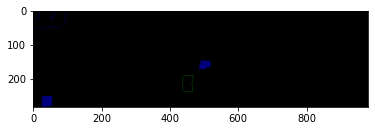

In [70]:
plt.imshow(dummy_images)

In [21]:
type(contours)

list

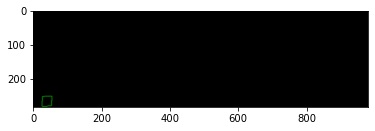

In [73]:
plt.imshow(cv2.drawContours(dummy_images,contours[0],-1,(0,255,0),2))

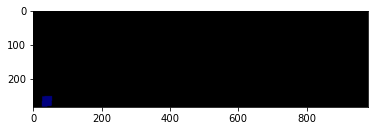

In [76]:
plt.imshow(cv2.fillConvexPoly(dummy_images,contours[0],(0,0,255)))

In [53]:
upper = np.array([0,0,255])
lower = np.array([0,0,255])
mask = cv2.inRange(dummy_images,lower,upper)

In [54]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
mask.shape

(282, 981)

In [65]:
output = cv2.bitwise_and(dummy_images,dummy_images,mask=mask)

In [66]:
output

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int8)

In [3]:
import cv2
cv2.imread('backgroundimage.png').shape

(312, 981, 3)

In [136]:
import numpy as np
import cv2
import pandas as pd
#import imutils

#original = 'frames/8.png'
#E = 'erode8.png'
def DetectAllAreas(erode_image,original):
    image = cv2.imread(erode_image,0)
    o  = cv2.imread(original,0)
    #---- removing the noise 
    #Gimg  = cv2.GaussianBlur(image,(7,7),0)
    #image = cv2.erode(image,None,iterations=1)
    image = cv2.dilate(image,None,iterations=1)

    #cv2.imshow("erode",image)
    #cv2.waitKey(0)
    image = image[30:,:]
    vehicle_count=0

    image = cv2.dilate(image,None,iterations=5)
    #cv2.imwrite("dilated.png",image)
    cv2.waitKey(0)
    bike_area = []
    car_area = []
    cnts, hierarchy = cv2.findContours(image, cv2.RNG_UNIFORM, cv2.CHAIN_APPROX_NONE)
    multiple_contours = []
    max_contours = []
    for c in cnts:
        orig = image.copy()
        area = cv2.contourArea(c)
        if area > 550:
            dummy_image = np.zeros((312,981),np.uint8)
            if area <= 1500: #for bikes
                cv2.drawContours(dummy_image,c,-1,(255,0,0),thickness = 2)
                cv2.fillConvexPoly(dummy_image,c,(255,0,0)) #filling area inside the contour
                bikeAreaPixels = np.count_nonzero(dummy_image)
                bike_area.append(bikeAreaPixels)
           
            elif area > 1500: #for cars
                cv2.drawContours(dummy_image,c,-1,(255,0,0),thickness = 2)
                cv2.fillConvexPoly(dummy_image,c,(255,0,0))
                carAreaPixels = np.count_nonzero(dummy_image)
                car_area.append(carAreaPixels)
            
                
                
    return sum(car_area), sum(bike_area)

In [137]:
car_area_per_frame = []
bike_area_per_frame = []
for i in range(1,29):
    c,b = DetectAllAreas(f'erode{i}.png',f'frames/{i}.png') #getting area of bikes and cars in pixels for each frames
    car_area_per_frame.append(c)
    bike_area_per_frame.append(b)

In [138]:
for i in range(28):
    print(f"{i+1} ==> "+str(100 - (car_area_per_frame[i] + bike_area_per_frame[i]) /(312*981)*100))

1 ==> 91.09719281737631
2 ==> 82.32115319271283
3 ==> 82.11270550720093
4 ==> 78.1757233592096
5 ==> 78.3743694294153
6 ==> 80.06155414412295
7 ==> 77.40989048328498
8 ==> 85.20348153375676
9 ==> 81.77095585352467
10 ==> 78.04078778849421
11 ==> 79.57310698136386
12 ==> 78.9114979481952
13 ==> 78.30445124023106
14 ==> 85.58607125120886
15 ==> 81.29459734964323
16 ==> 83.4241616351708
17 ==> 83.42971588384432
18 ==> 73.4216132151912
19 ==> 77.55397422828615
20 ==> 79.04022582921665
21 ==> 79.55121670718
22 ==> 80.03803026738807
23 ==> 84.55232755691472
24 ==> 87.07330301366999
25 ==> 84.05440549935963
26 ==> 90.93023863666066
27 ==> 81.48311508403252
28 ==> 84.46640006273034


In [120]:
img.shape

(312, 981)

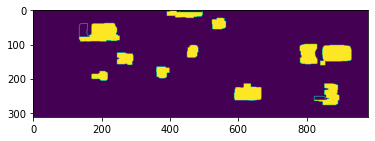

In [121]:
plt.imshow(img)

In [96]:
car_area_per_frame[0] + bike_area_per_frame[0] 

24778

In [45]:
9/10

0.9

In [3]:
pd.read_excel('vehicles_area.xlsx')

Unnamed: 0     bike      car
0            0   5543.0  17429.0
1            1   6267.0  40555.5
2            2   9947.0  39401.5
3            3  10173.5  52218.5
4            4   9136.0  48202.0
5            5  12163.5  40855.5
6            6   1833.0  57800.0
7            7   5986.0  27018.5
8            8   3013.5  46434.5
9            9   8308.0  51015.0
10          10   3669.0  54978.0
11          11   7365.0  56680.0
12          12   5281.5  54099.5
13          13   5301.0  38332.0
14          14  10179.5  42993.5
15          15   5568.5  41045.5
16          16   5487.0  44077.5
17          17   9660.0  65802.5
18          18  11661.0  51919.0
19          19  13524.0  43784.5
20          20   8892.0  46001.0
21          21   9878.0  43845.5
22          22  10362.5  37856.5
23          23   2727.5  35829.0
24          24   3872.5  36727.0
25          25   3805.5  19368.5
26          26  11196.0  38533.5
27          27   9292.0  34924.0